# eTraGo: Analysis Example

This notebook provides an overview of the types of results you can generate with eTraGo and demonstrates how to analyse them.
To follow along, please download the optimization results from __[eTraGo Results eGon2035](https://zenodo.org/records/10160482)__, which were produced as part of the publication by __[Büttner et al.](https://doi.org/10.1016/j.rset.2024.100082)__ . Please refer to this publication for more information on the settings of the calculations.

## Import eTraGo and initialize object with downloaded results

The results comprise optimized, sector-coupled EHV and HV grids within Germany, incorporating several flexibility options for the year 2035.
Three scenario variants were analysed, two of which are examined in more detail here as illustrative examples.
* Scenario *base* represents the energy system in 2035 considering a fast roll-out of flexibility options.
* Scenario *lowflex* considers only few flexibilities to be available.

In [1]:
import warnings
warnings.filterwarnings('ignore')

from etrago import Etrago

In [2]:
# Please adapt the corresponding path to the downloaded results if needed
etrago_base = Etrago(csv_folder_name="../Buettner_et_al_Influence_of_flexibility_options/base")
etrago_lowflex = Etrago(csv_folder_name="../Buettner_et_al_Influence_of_flexibility_options/lowflex")

INFO:pypsa.io:Imported network base has buses, generators, lines, links, loads, storage_units, stores
                    No args.json in /home/clara/Downloads/Buettner_et_al_Influence_of_flexibility_options/base available.
                    
INFO:etrago.network:
                        No disaggregated network available.
                        
INFO:etrago.network:
                            No separate market model available.
                            
INFO:pypsa.io:Imported network lowflex has buses, generators, lines, links, loads, storage_units, stores
                    No args.json in /home/clara/Downloads/Buettner_et_al_Influence_of_flexibility_options/lowflex available.
                    
INFO:etrago.network:
                        No disaggregated network available.
                        
INFO:etrago.network:
                            No separate market model available.
                            


## Analysis of results

### Summary of main results

With the following commands, some central optimization results are calculated and presented within a overview:

In [3]:
etrago_base.calc_results()
etrago_base.results

,unit,value
annual system costs,EUR/a,111106387380.792816
annual investment costs,EUR/a,3805964386.510099
annual marginal costs,EUR/a,107300422994.282715
annual electrical grid investment costs,EUR/a,1155635219.914265
annual ac grid investment costs,EUR/a,221625184.119175
annual dc grid investment costs,EUR/a,934010035.79509
annual links investment costs,EUR/a,856878656.167354
annual storage+store investment costs,EUR/a,1793450510.42848
annual electrical storage investment costs,EUR/a,1408546528.455134
annual store investment costs,EUR/a,384903981.973345


In [4]:
etrago_lowflex.calc_results()
etrago_lowflex.results

,unit,value
annual system costs,EUR/a,111927371187.533401
annual investment costs,EUR/a,3059906287.919371
annual marginal costs,EUR/a,108867464899.614029
annual electrical grid investment costs,EUR/a,1208150163.949301
annual ac grid investment costs,EUR/a,269611216.568835
annual dc grid investment costs,EUR/a,938538947.380466
annual links investment costs,EUR/a,337829405.926657
annual storage+store investment costs,EUR/a,1513926718.043413
annual electrical storage investment costs,EUR/a,1408545109.132652
annual store investment costs,EUR/a,105381608.910761


### Grid and storage expansion

To take a closer look at grid and storage expansion, as well as their spatial distribution, the *plot_grid* function can be used and parametrized to display the desired results.

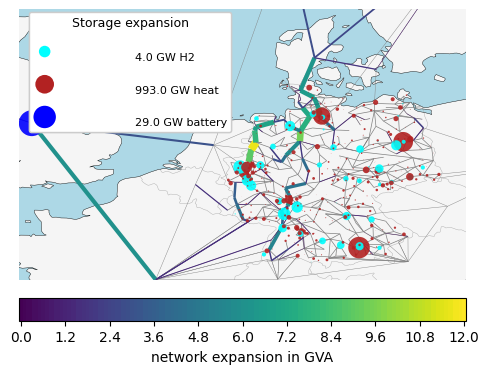

In [5]:
etrago_base.plot_grid(
    line_colors="expansion_abs",
    ext_width=2000,
    bus_colors="storage_expansion",
    scaling_store_expansion = {"H2": 2,
    "heat": 0.02,
    "battery": 1}
    )

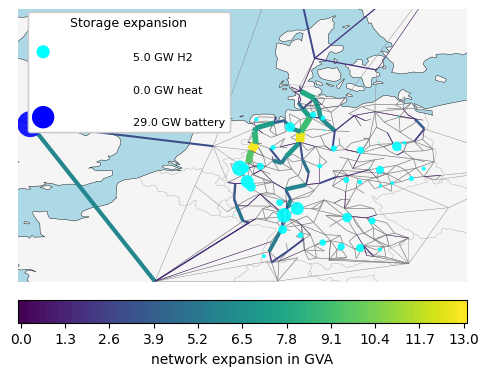

In [6]:
etrago_lowflex.plot_grid(
    line_colors="expansion_abs",
    ext_width=2000,
    bus_colors="storage_expansion",
    scaling_store_expansion = {"H2": 2,
    "heat": 0.02,
    "battery": 1}
    )

### Flexibility dispatch

The following function visualizes the flexibility potential and its utilization over selected snapshots or the year for a selected flexibility option (e.g., 'BEV charger', 'dsm', 'heat', 'h2_store'):

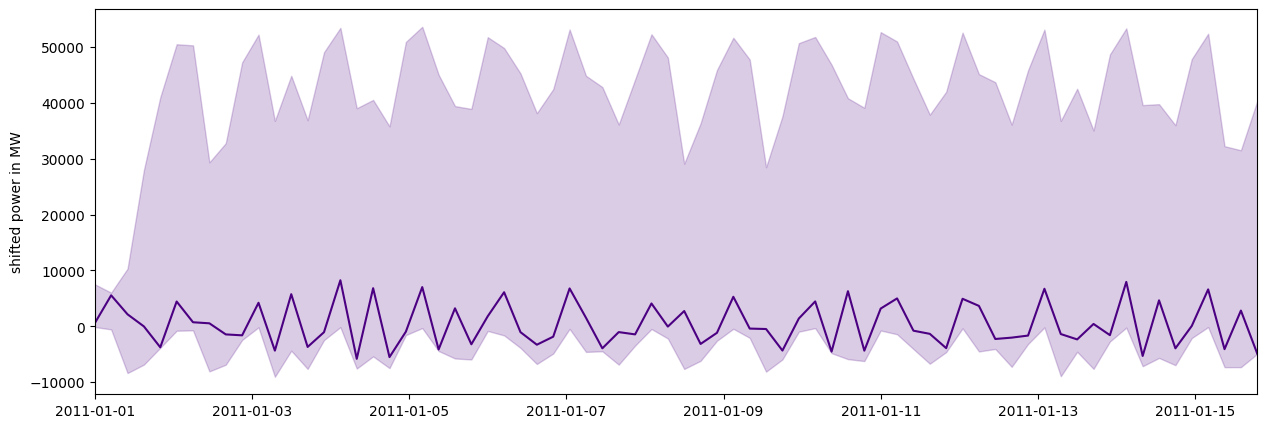

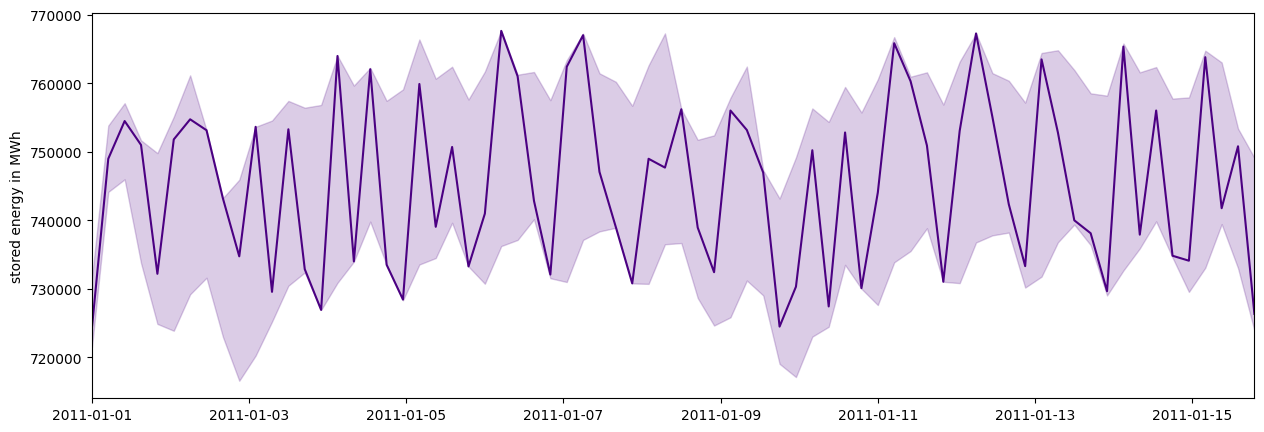

In [7]:
etrago_base.plot_flexibility_usage("BEV charger", snapshots=etrago_base.network.snapshots[:72])

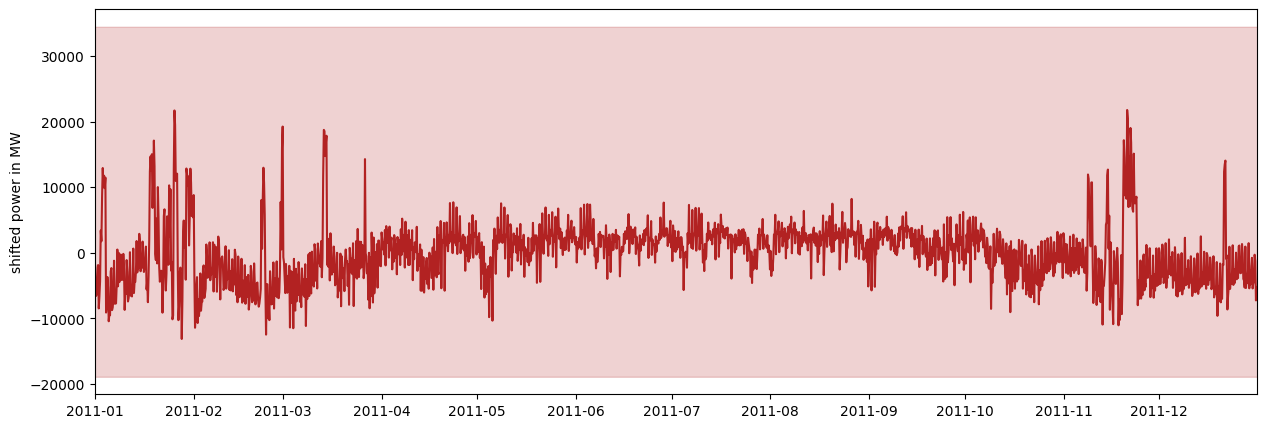

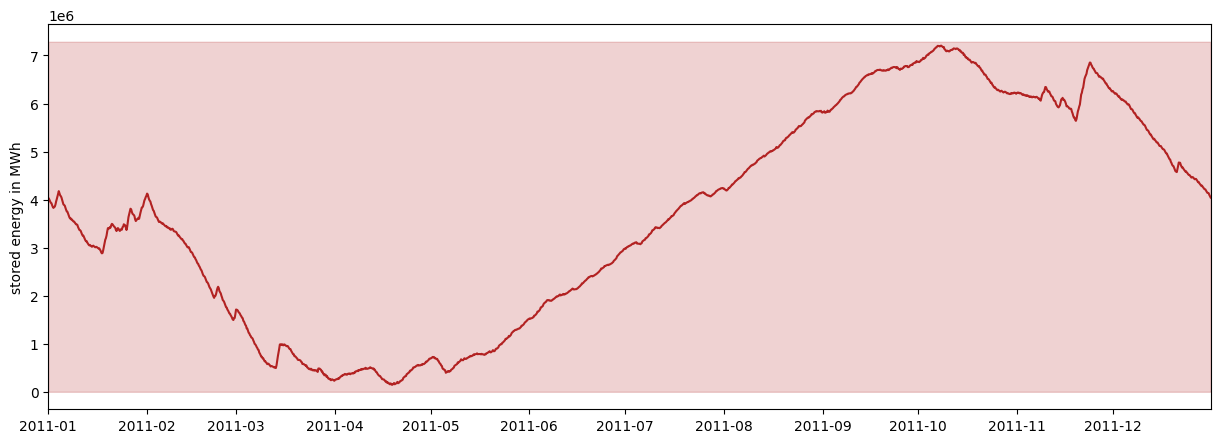

In [8]:
etrago_base.plot_flexibility_usage("heat")

To compare the utilisation of different flexibility options,  technology specific duration curves of flexibility usage throughout the year can be plotted:

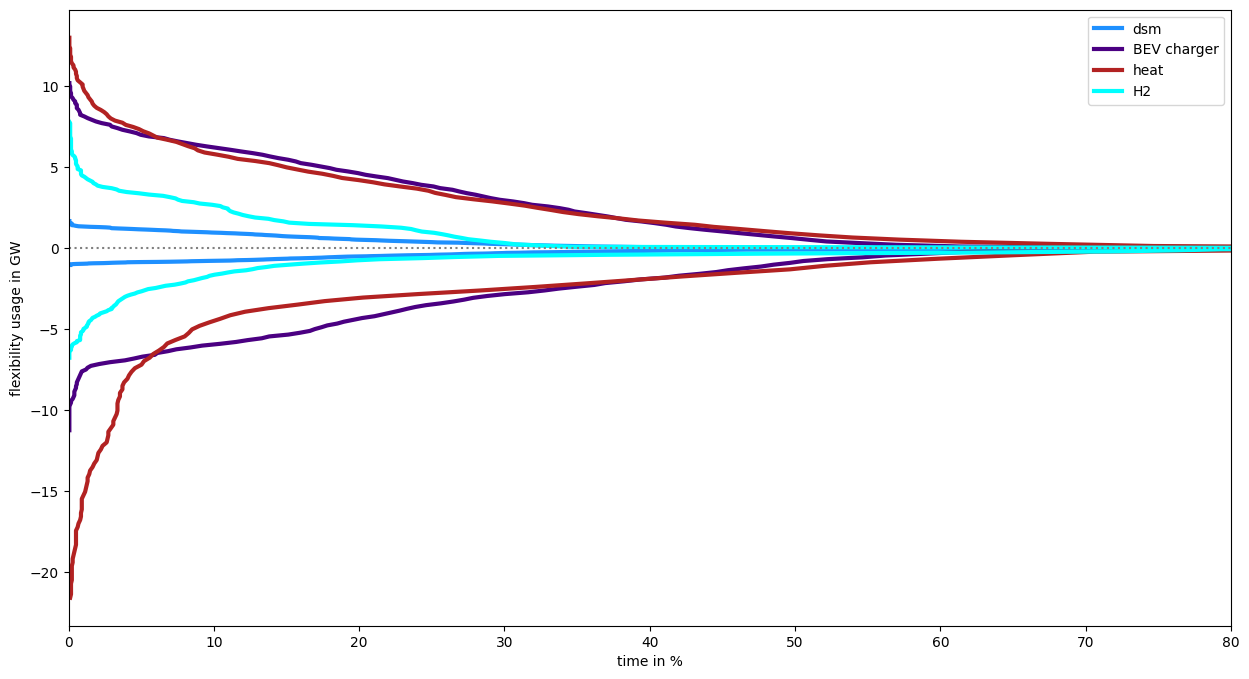

In [9]:
from etrago.analyze.plot import plot_flexibility_duration_curve
plot_flexibility_duration_curve(etrago_base, etrago_lowflex)

### Generator dispatch

Several functions in analyze/plot.py provide visualizations of different aspects of the optimized power plant dispatch, for example:

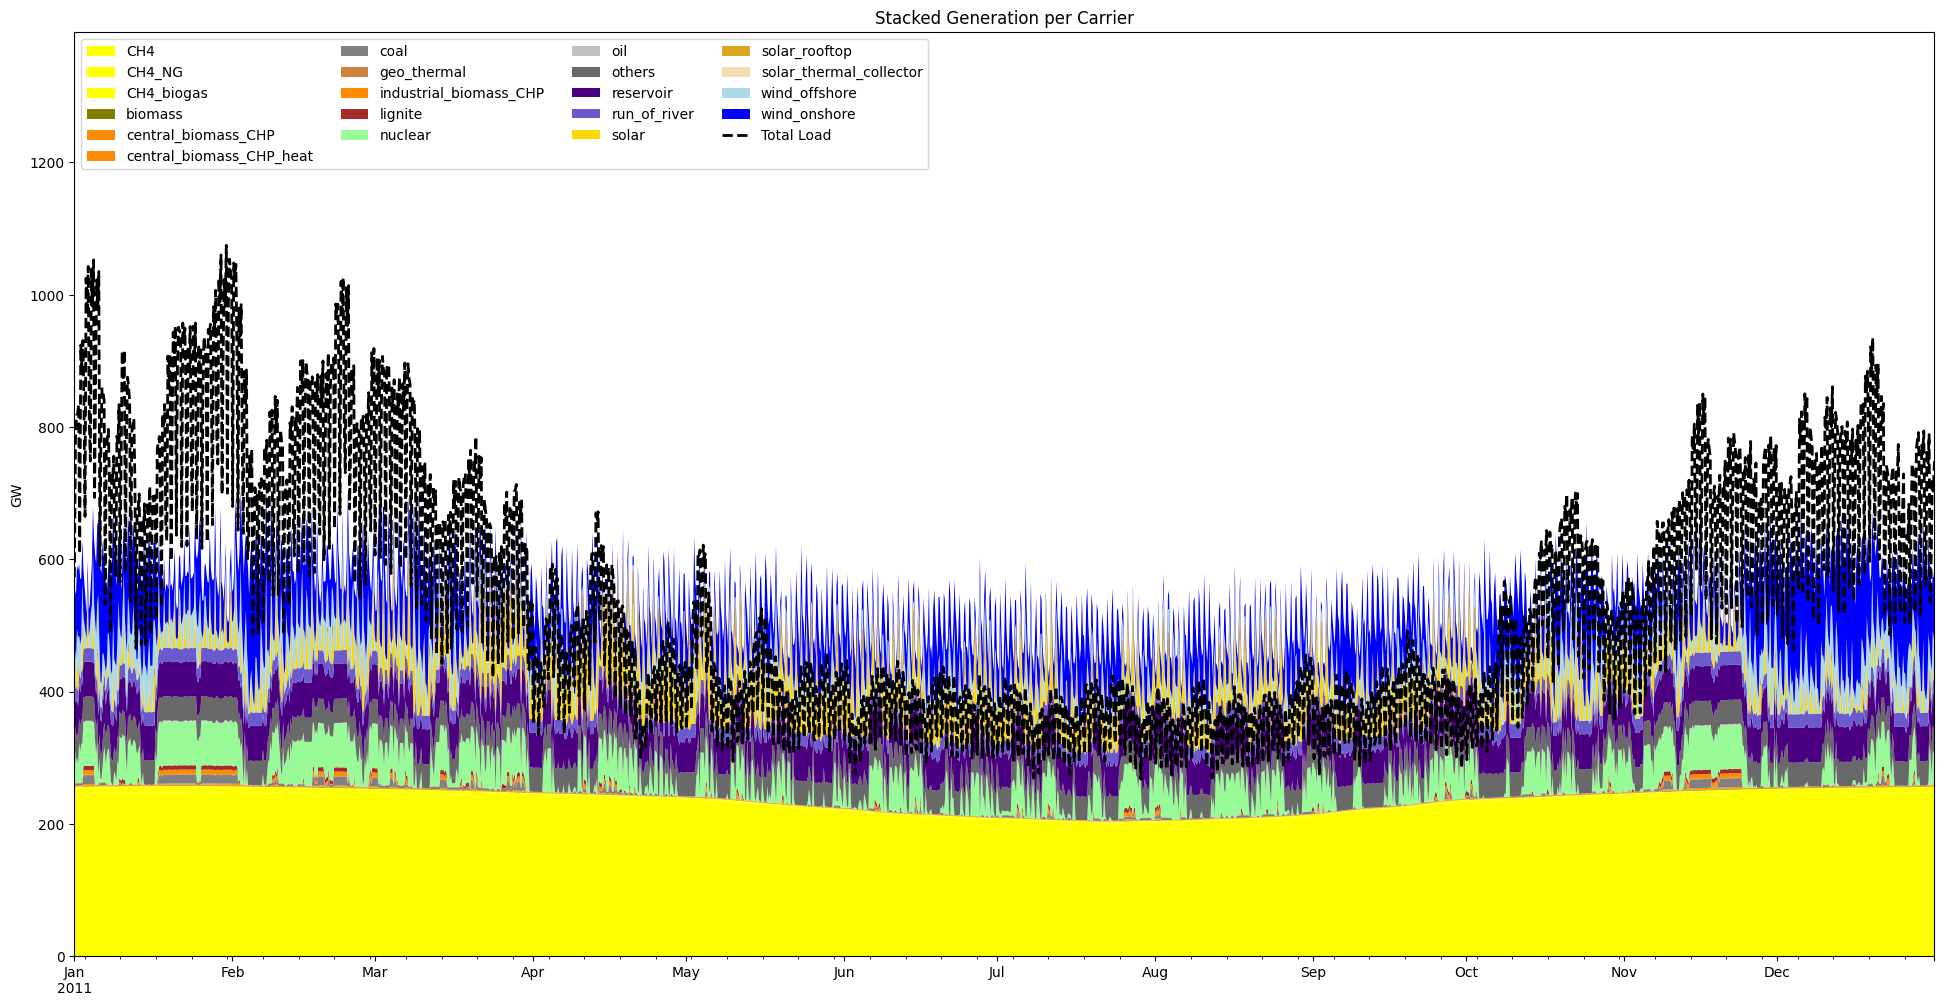

In [10]:
etrago_base.plot_stacked_gen()

### More Functions 

For additional functions to analyse and visualize the results, please refer to the scripts *calc_results.py* and *plot.py*, which are part of the *analyze* module.